In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df1 = pd.read_excel('PD on and off - circles test.xlsx', sheet_name='MDE')
df2 = pd.read_excel('PD on and off - lleell test.xlsx', sheet_name='MDE')
df3 = pd.read_excel('PD on and off - llllll test.xlsx', sheet_name='MDE')

In [3]:
df1 = df1.append(df2)
df1 = df1.append(df3)

In [4]:
pd.set_option('display.max_columns', 23)
df1.head()

,Group,Subject,Condition,Trial,Segment,Duration,VerticalSize,PeakVerticalVelocity,PeakVerticalAcceleration,HorizontalSize,LoopSurface,RelativeTimeToPeakVerticalVelocity,RelativeDuration1,RelativeDuration2,FrequencyofSecondary2,AbsoluteSize,AverageAbsoluteVelocity,Roadlength,AverageNormalizedJerkPerTrial,NumberOfPeakAccelerationPoints,AveragePenPressure
0,2,11,1,1,1,0.8638,0.0749,0.6555,12.1651,-0.2455,0.0000,0.0794,0.1737,0.8263,1.0,0.2567,0.3343,0.2887,169.32,11,647.701
1,2,11,1,1,2,0.9878,-1.8223,-3.9267,-35.9833,0.3999,0.0000,0.5342,0.6895,0.3105,1.0,1.8656,2.7256,2.6924,169.32,13,842.152
2,2,11,1,1,3,0.9616,1.8979,4.1225,27.0945,-0.0161,0.0000,0.4156,0.5102,0.4898,1.0,1.8980,3.0897,2.9711,169.32,11,980.927
3,2,11,1,1,4,0.9849,-2.1686,-4.4227,-34.5664,0.0415,2.7968,0.5995,0.6954,0.3046,1.0,2.1690,3.2307,3.1820,169.32,13,1016.790
4,2,11,1,1,5,0.7322,2.1921,5.6485,47.0709,0.2517,0.0000,0.4214,0.5687,0.4313,1.0,2.2065,4.1646,3.0495,169.32,9,1005.990


In [5]:
df1.nunique()

Group                                    2
Subject                                 24
Condition                                1
Trial                                    3
Segment                                 12
Duration                              3981
VerticalSize                          4519
PeakVerticalVelocity                  4674
PeakVerticalAcceleration              4735
HorizontalSize                        4049
LoopSurface                           1679
RelativeTimeToPeakVerticalVelocity    3324
RelativeDuration1                     2772
RelativeDuration2                     2772
FrequencyofSecondary2                    2
AbsoluteSize                          4292
AverageAbsoluteVelocity               4519
Roadlength                            4371
AverageNormalizedJerkPerTrial          408
NumberOfPeakAccelerationPoints          56
AveragePenPressure                    4692
dtype: int64

In [6]:
df1.describe()

,Group,Subject,Condition,Trial,Segment,Duration,VerticalSize,PeakVerticalVelocity,PeakVerticalAcceleration,HorizontalSize,LoopSurface,RelativeTimeToPeakVerticalVelocity,RelativeDuration1,RelativeDuration2,FrequencyofSecondary2,AbsoluteSize,AverageAbsoluteVelocity,Roadlength,AverageNormalizedJerkPerTrial,NumberOfPeakAccelerationPoints,AveragePenPressure
count,4829.000000,4829.000000,4829.0,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000
mean,1.514599,87.509008,1.0,1.975150,6.370677,0.809529,0.005976,0.198254,0.401620,0.207845,0.136962,0.442983,0.670498,0.329502,0.739931,1.381418,2.753609,1.779804,886.242151,10.586250,628.844943
std,0.499839,27.717681,0.0,0.816795,3.418675,0.529115,1.479899,5.161299,85.228422,0.442145,1.225715,0.213100,0.255922,0.255922,0.438688,0.721198,1.965743,1.044056,3885.202783,7.226386,174.007936
min,1.000000,11.000000,1.0,1.000000,1.000000,0.054400,-4.831300,-58.108800,-1861.120000,-1.325500,-16.775500,-8.588200,0.038800,0.000000,0.000100,0.000400,0.005300,0.001100,18.447700,0.000000,0.000000
25%,1.000000,70.000000,1.0,1.000000,3.000000,0.478000,-1.182500,-3.389400,-39.585800,-0.061900,0.000000,0.337800,0.472800,0.000000,0.000100,0.926700,1.325200,1.098600,82.191600,6.000000,524.265000
50%,2.000000,91.000000,1.0,2.000000,6.000000,0.701000,0.006300,0.197600,3.698000,0.151400,0.000000,0.444800,0.632000,0.368000,1.000000,1.270600,2.195900,1.540100,233.005000,9.000000,648.762000
75%,2.000000,112.000000,1.0,3.000000,9.000000,0.986200,1.220400,3.817400,41.369400,0.441700,0.087600,0.555600,1.000000,0.527200,1.000000,1.761700,3.680500,2.313600,672.991000,13.000000,746.957000
max,2.000000,118.000000,1.0,3.000000,12.000000,7.193500,4.618100,37.047600,2177.620000,2.943500,11.664400,1.536100,1.000000,0.961200,1.000000,4.843600,20.116300,7.914300,68380.200000,101.000000,1023.000000


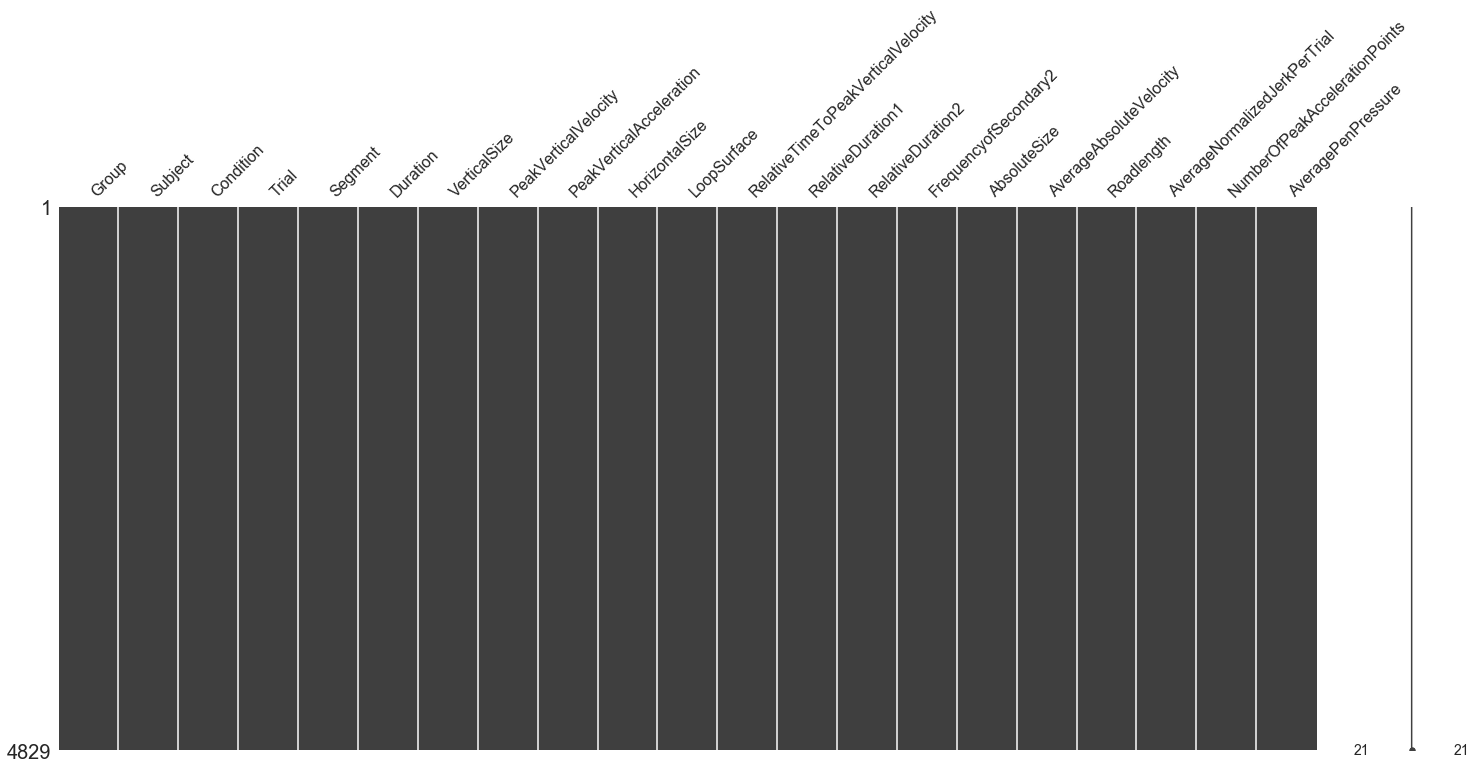

In [7]:
import missingno

missingno.matrix(df1)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4829 entries, 0 to 1588
Data columns (total 21 columns):
Group                                 4829 non-null int64
Subject                               4829 non-null int64
Condition                             4829 non-null int64
Trial                                 4829 non-null int64
Segment                               4829 non-null int64
Duration                              4829 non-null float64
VerticalSize                          4829 non-null float64
PeakVerticalVelocity                  4829 non-null float64
PeakVerticalAcceleration              4829 non-null float64
HorizontalSize                        4829 non-null float64
LoopSurface                           4829 non-null float64
RelativeTimeToPeakVerticalVelocity    4829 non-null float64
RelativeDuration1                     4829 non-null float64
RelativeDuration2                     4829 non-null float64
FrequencyofSecondary2                 4829 non-null float64
Abs

In [9]:
df1["Trial"]= df1["Trial"].astype(object) 
df1["Segment"]= df1["Segment"].astype(object) 
df1["Condition"]= df1["Condition"].astype(object) 


# Finding the outliers



In [10]:
cont_var = ['Segment', 'Duration',
       'VerticalSize', 'PeakVerticalVelocity', 'PeakVerticalAcceleration',
       'HorizontalSize', 'LoopSurface', 'RelativeTimeToPeakVerticalVelocity',
       'RelativeDuration1', 'RelativeDuration2', 'FrequencyofSecondary2',
       'AbsoluteSize', 'AverageAbsoluteVelocity', 'Roadlength',
       'AverageNormalizedJerkPerTrial', 'NumberOfPeakAccelerationPoints',
       'AveragePenPressure']

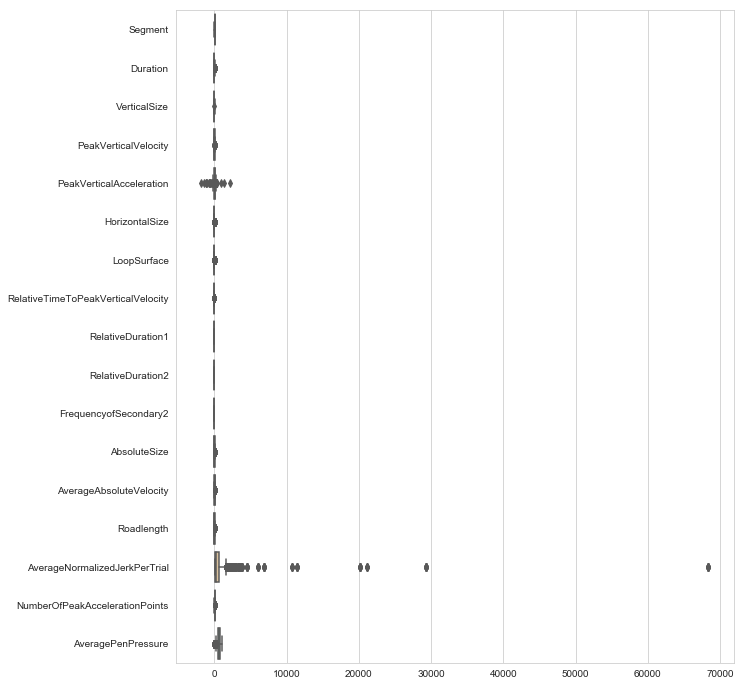

In [11]:
plt.figure(figsize=(10,12))
ax = sns.boxplot(data=df1[cont_var], orient="h", palette="Set2" )

In [12]:
df1 = df1[df1['AverageNormalizedJerkPerTrial']<5000]

# Univariate analysis

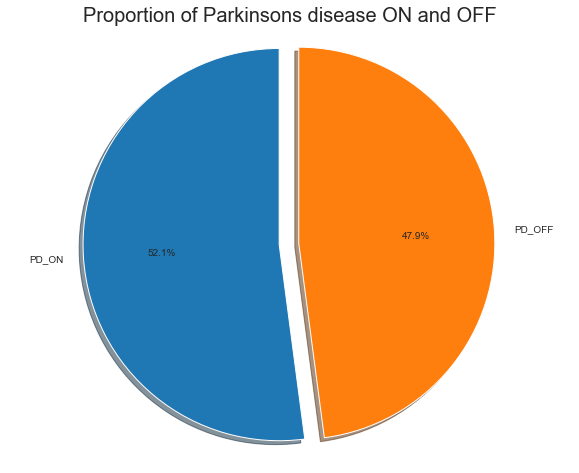

In [13]:
labels = 'PD_ON', 'PD_OFF'
sizes = [df1.Group[df1.Group==2].count(),df1.Group[df1.Group==1].count() ]
explode = (0,0.1)
fig,ax = plt.subplots(figsize = (10,8))
ax.pie(sizes,explode =explode,labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax.axis('equal')
plt.title('Proportion of Parkinsons disease ON and OFF', size =20)
plt.show()

In [14]:
parkinsons = {2:'PD_ON', 1:'PD_OFF'}
df1['Group'] = [parkinsons[i] for i in df1.Group]

In [15]:
df1.head()

,Group,Subject,Condition,Trial,Segment,Duration,VerticalSize,PeakVerticalVelocity,PeakVerticalAcceleration,HorizontalSize,LoopSurface,RelativeTimeToPeakVerticalVelocity,RelativeDuration1,RelativeDuration2,FrequencyofSecondary2,AbsoluteSize,AverageAbsoluteVelocity,Roadlength,AverageNormalizedJerkPerTrial,NumberOfPeakAccelerationPoints,AveragePenPressure
0,PD_ON,11,1,1,1,0.8638,0.0749,0.6555,12.1651,-0.2455,0.0000,0.0794,0.1737,0.8263,1.0,0.2567,0.3343,0.2887,169.32,11,647.701
1,PD_ON,11,1,1,2,0.9878,-1.8223,-3.9267,-35.9833,0.3999,0.0000,0.5342,0.6895,0.3105,1.0,1.8656,2.7256,2.6924,169.32,13,842.152
2,PD_ON,11,1,1,3,0.9616,1.8979,4.1225,27.0945,-0.0161,0.0000,0.4156,0.5102,0.4898,1.0,1.8980,3.0897,2.9711,169.32,11,980.927
3,PD_ON,11,1,1,4,0.9849,-2.1686,-4.4227,-34.5664,0.0415,2.7968,0.5995,0.6954,0.3046,1.0,2.1690,3.2307,3.1820,169.32,13,1016.790
4,PD_ON,11,1,1,5,0.7322,2.1921,5.6485,47.0709,0.2517,0.0000,0.4214,0.5687,0.4313,1.0,2.2065,4.1646,3.0495,169.32,9,1005.990


In [25]:
df1.Subject.unique()

array([ 11,  29,  44,  63,  64,  69,  70,  72,  74,  77,  81,  89,  91,
        92, 106, 107, 110, 111, 112, 113, 115, 116, 117, 118], dtype=int64)

In [16]:
def Visualise_plot(df, col_to_exclude, tgt_col,object_mode = True):
    n = 0
    this= []
    
    if object_mode:
        n_rows = 2
        n_cols = 2
        width = 20
        height = 20
    else:
        n_rows = 5
        n_cols = 2
        width = 20
        height = 20
    
    for column in df.columns:
        if object_mode:
            if(df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)
        else: 
            if(df[column].dtypes != 'O') & (column != tgt_col):
                this.append(column)
    
    fig,ax = plt.subplots(n_rows, n_cols, sharex = False, sharey = False, figsize = (width,height))
    
    for row in range(n_rows):
        for col in range(n_cols):
            if object_mode:
                g = sns.countplot(df[this[n]], ax = ax[row][col])
            
            else:
                g = sns.distplot(df[this[n]], ax = ax[row][col])
                
            ax[row,col].set_title('column name : {}'.format(this[n]))
            ax[row,col].set_xlabel("")
            ax[row,col].set_ylabel("")
            n += 1
            
    plt.show()
    return
                

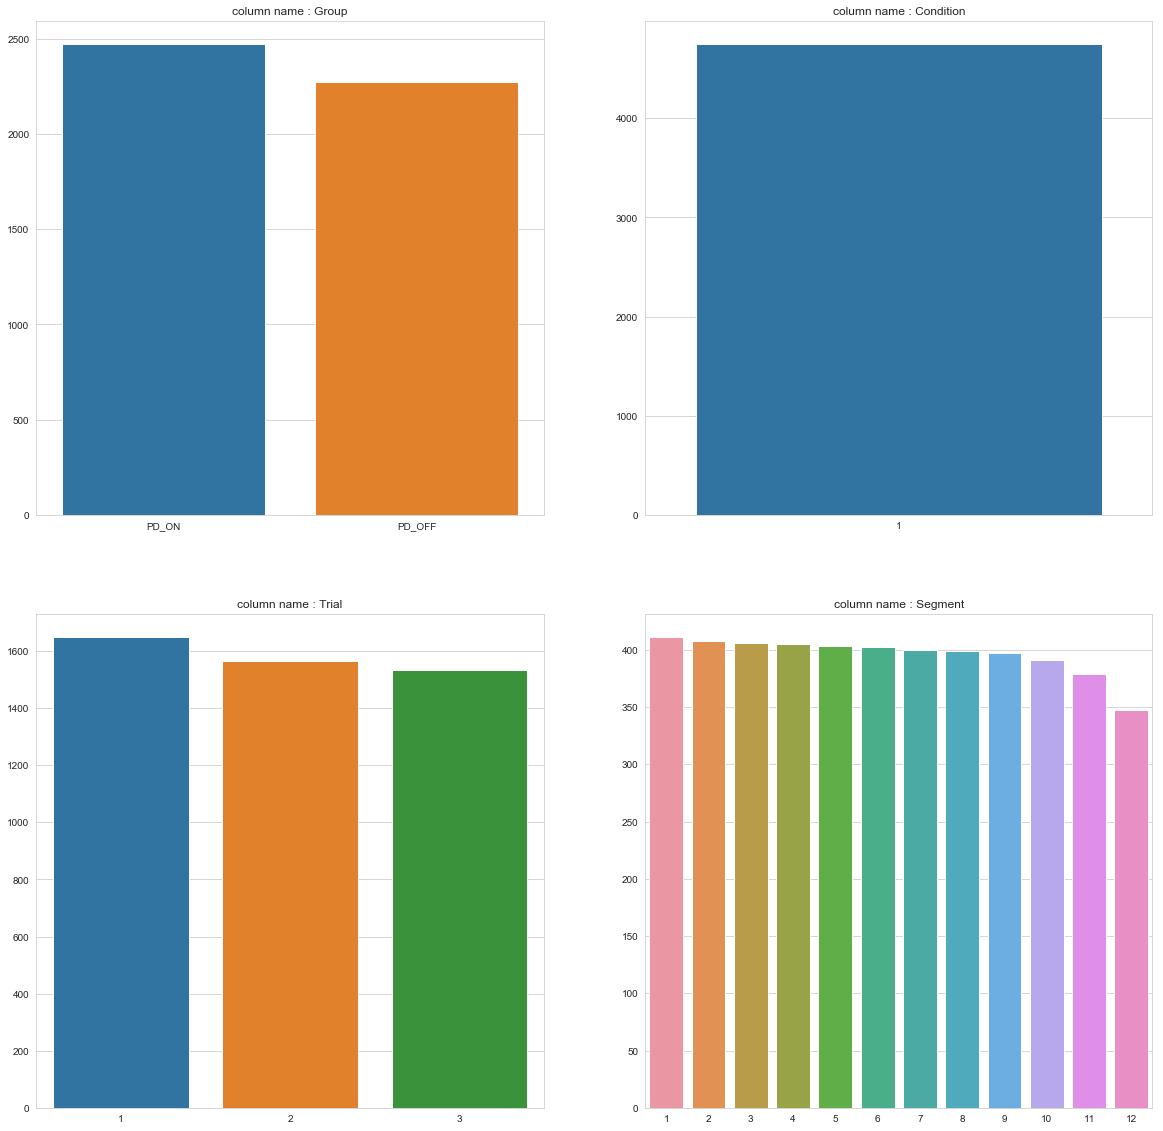

In [17]:
Visualise_plot(df1,'Subject', 'Group', object_mode=True)

In [18]:
df1 = df1.drop('Condition', axis= 1)

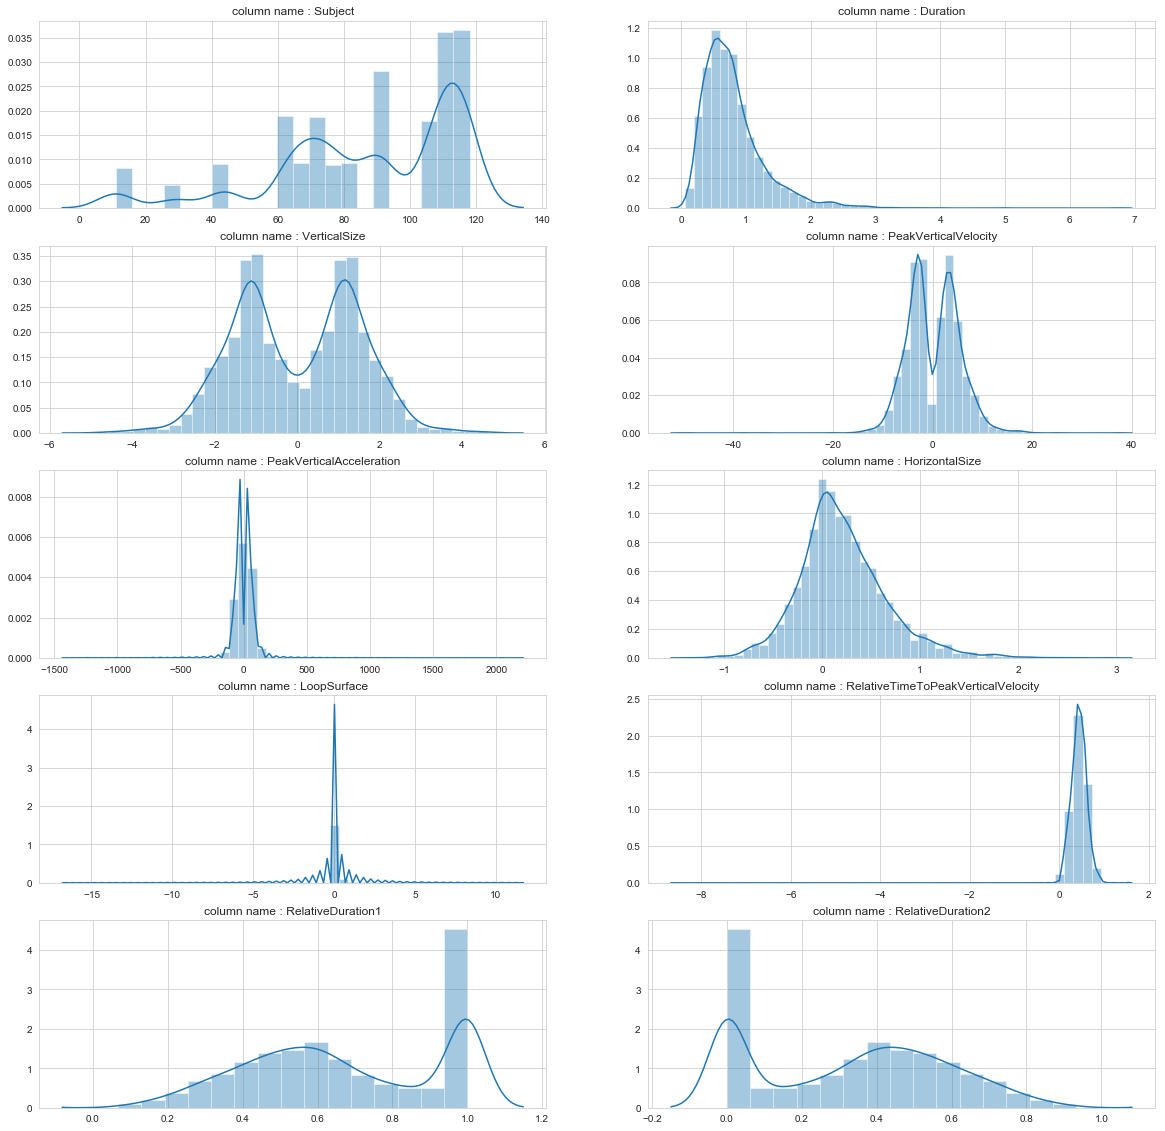

In [19]:
Visualise_plot(df1, 'Subject', 'Group', object_mode= False)

# Bivariate Analysis

##### Categorical Variable

In [20]:
def bi_variate(df, col1, col2):
    if col2 == 'Group':
        cross_name = pd.crosstab(df[col1], df[col2]).apply(lambda x: x/x.sum() * 100, axis = 1)
    else:
        cross_name = pd.crosstab(df[col1], df[col2]).apply(lambda x: x/x.sum() * 100, axis = 0)
    
    cross_name.plot.bar()
    plt.xlabel('{}'.format(col1))
    plt.ylabel('% of the PD')
    plt.title('{} vs PD'.format(col1))
    plt.figure(figsize = (20,20))
    plt.show()
    return cross_name
    

In [21]:
df1.head()

,Group,Subject,Trial,Segment,Duration,VerticalSize,PeakVerticalVelocity,PeakVerticalAcceleration,HorizontalSize,LoopSurface,RelativeTimeToPeakVerticalVelocity,RelativeDuration1,RelativeDuration2,FrequencyofSecondary2,AbsoluteSize,AverageAbsoluteVelocity,Roadlength,AverageNormalizedJerkPerTrial,NumberOfPeakAccelerationPoints,AveragePenPressure
0,PD_ON,11,1,1,0.8638,0.0749,0.6555,12.1651,-0.2455,0.0000,0.0794,0.1737,0.8263,1.0,0.2567,0.3343,0.2887,169.32,11,647.701
1,PD_ON,11,1,2,0.9878,-1.8223,-3.9267,-35.9833,0.3999,0.0000,0.5342,0.6895,0.3105,1.0,1.8656,2.7256,2.6924,169.32,13,842.152
2,PD_ON,11,1,3,0.9616,1.8979,4.1225,27.0945,-0.0161,0.0000,0.4156,0.5102,0.4898,1.0,1.8980,3.0897,2.9711,169.32,11,980.927
3,PD_ON,11,1,4,0.9849,-2.1686,-4.4227,-34.5664,0.0415,2.7968,0.5995,0.6954,0.3046,1.0,2.1690,3.2307,3.1820,169.32,13,1016.790
4,PD_ON,11,1,5,0.7322,2.1921,5.6485,47.0709,0.2517,0.0000,0.4214,0.5687,0.4313,1.0,2.2065,4.1646,3.0495,169.32,9,1005.990


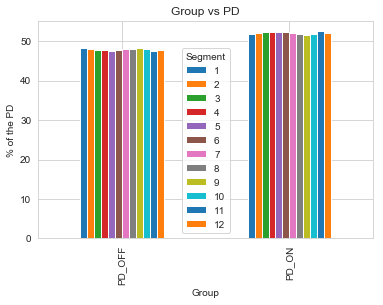

<Figure size 1440x1440 with 0 Axes>

Segment,1,2,3,4,5,6,7,8,9,10,11,12
Group,,,,,,,,,,,,
PD_OFF,48.175182,48.039216,47.783251,47.654321,47.64268,47.761194,48.0,48.120301,48.36272,48.081841,47.493404,47.838617
PD_ON,51.824818,51.960784,52.216749,52.345679,52.35732,52.238806,52.0,51.879699,51.63728,51.918159,52.506596,52.161383


In [22]:
bi_variate(df1, 'Group', 'Segment')

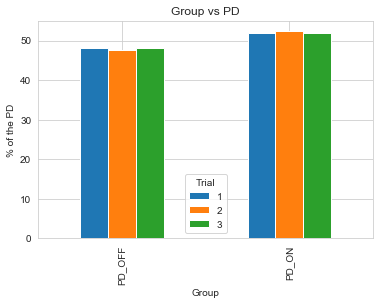

<Figure size 1440x1440 with 0 Axes>

Trial,1,2,3
Group,,,
PD_OFF,48.029109,47.634271,48.078176
PD_ON,51.970891,52.365729,51.921824


In [23]:
bi_variate(df1, 'Group', 'Trial')

##### Continous Variable

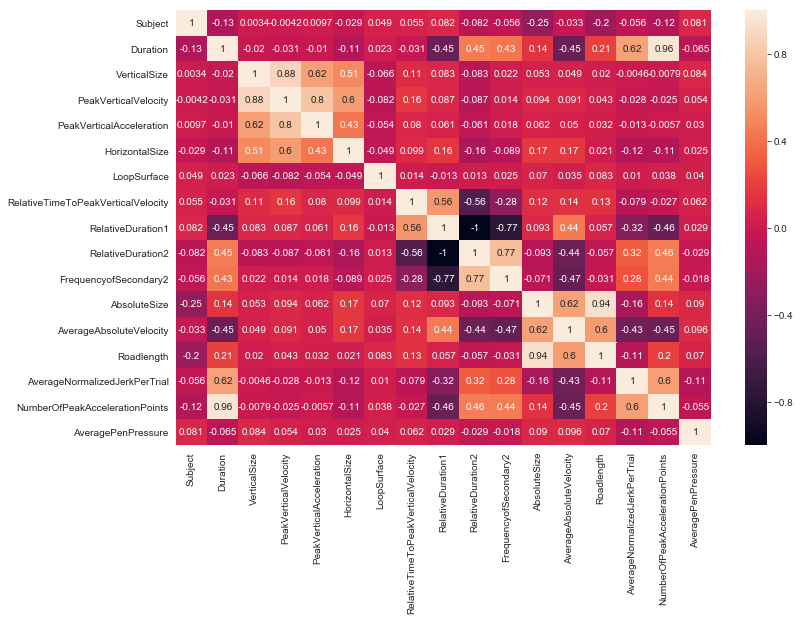

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),xticklabels=df1.corr().columns.values, yticklabels= df1.corr().columns.values,
           annot=True);

Relation of target variable with the other continous variable

In [25]:
parkin = {'PD_ON':2, 'PD_OFF':1}
df1['Group'] = df1['Group'].map(parkin)

In [26]:
df1_cont = df1.select_dtypes([np.int64, np.float64, np.float32])

In [27]:
df1_cont = df1_cont.drop('Subject', axis=1)

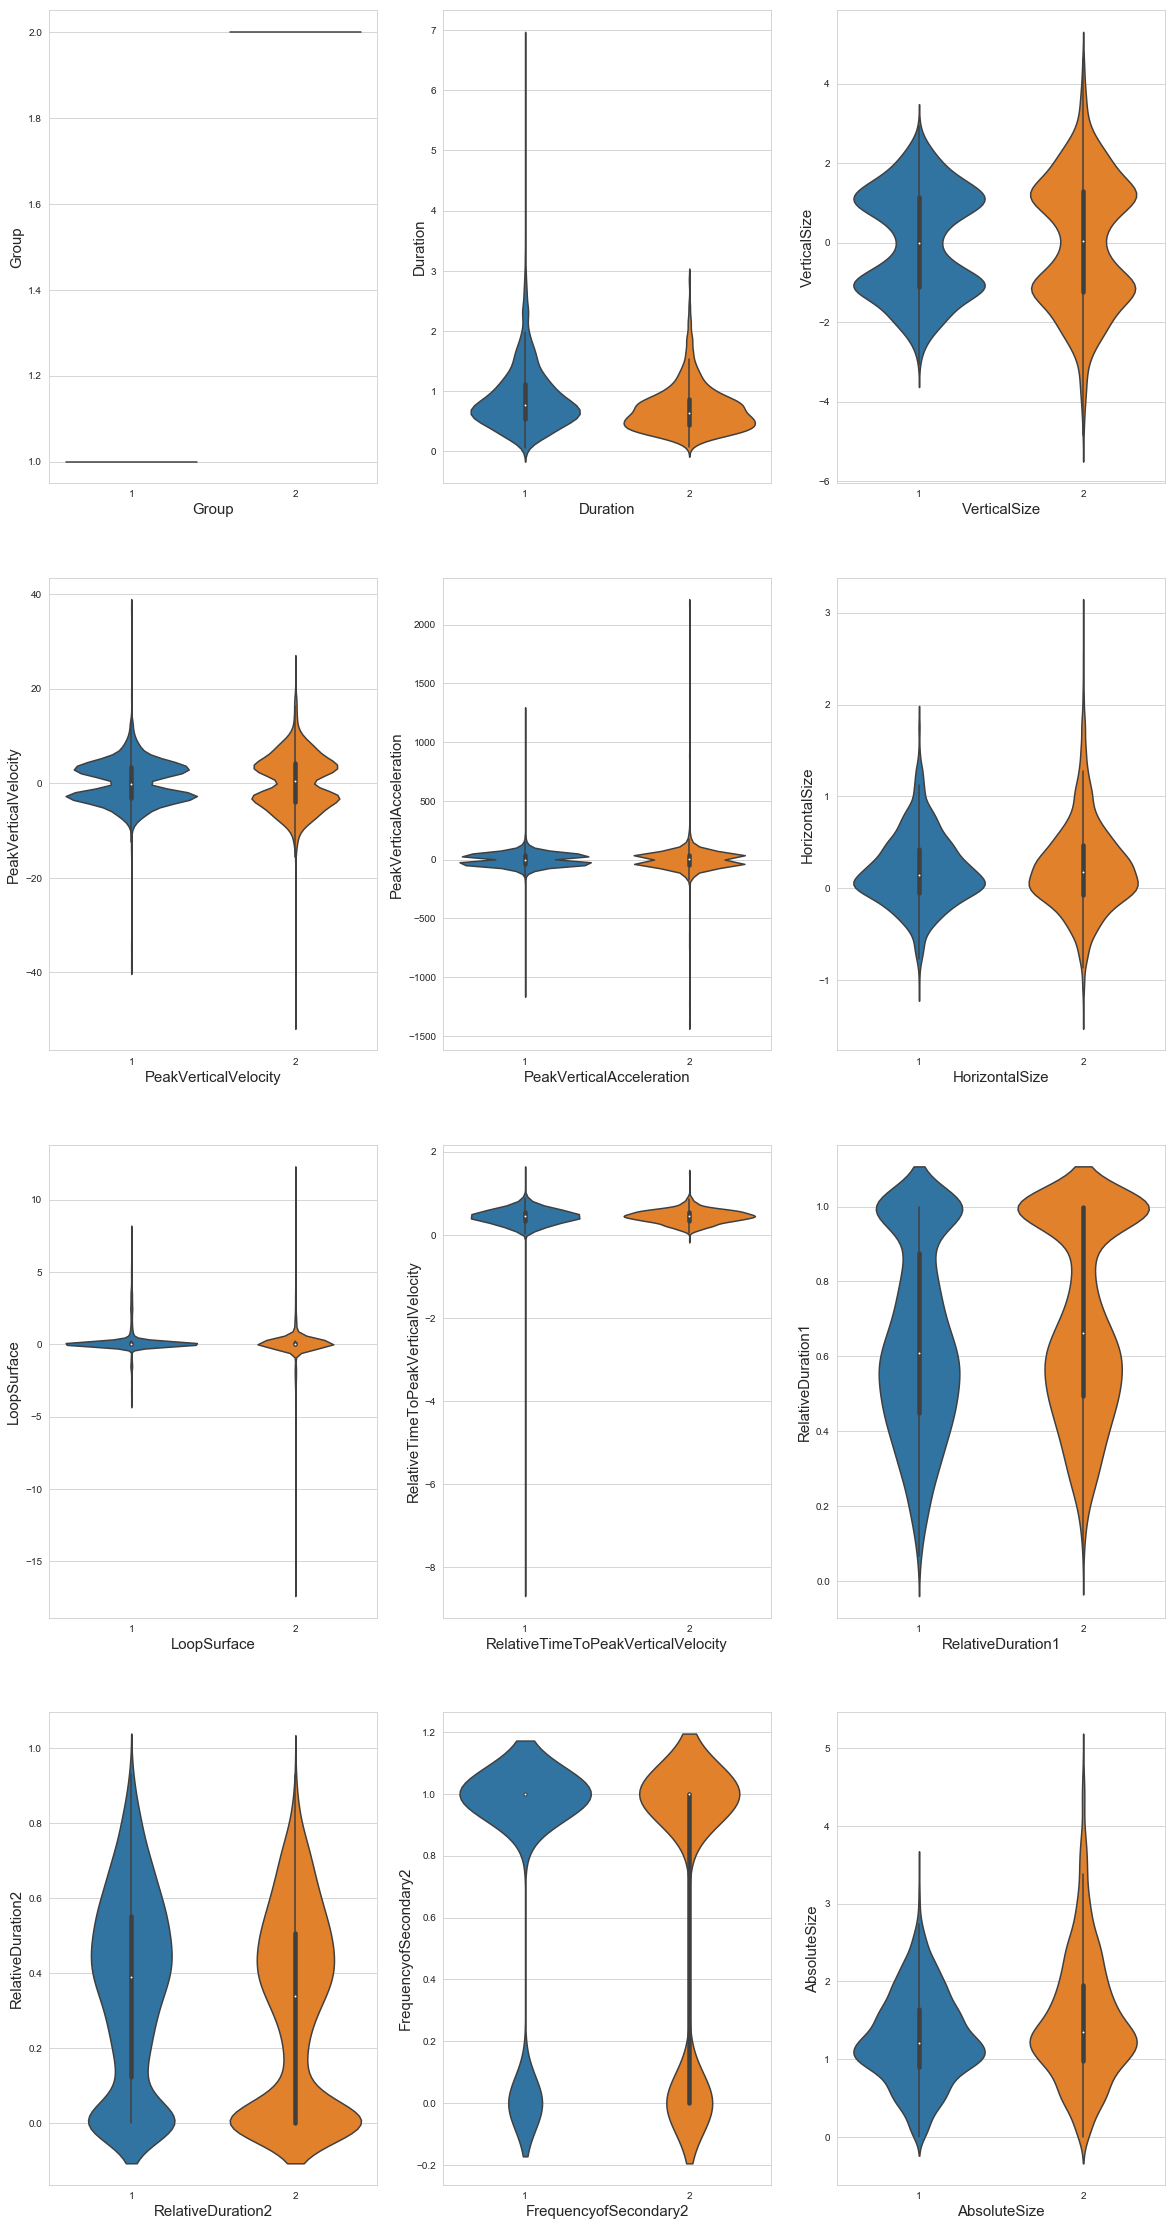

In [28]:
nrows = 4
ncols = 3
this = []
n = 0

for column in df1_cont.columns:
    this.append(column)

fig,ax = plt.subplots(nrows,ncols, figsize=(20,40))    


for row in range(nrows):
    for col in range(ncols):
        g = sns.violinplot(y= this[n], x = 'Group', data = df1_cont, ax = ax[row][col])
        
        ax[row][col].set_xlabel(this[n], fontsize = 15)
        ax[row][col].set_ylabel(this[n], fontsize = 15)
        n+=1

svm, Decision Tree, Logistic Regression,Random Forest Classification, XGBoost Classification, K means Clustering, K Nearest Neighbours  

# Feature Engineering

###### Encoding Categorical Variable

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
df1.head()

,Group,Subject,Trial,Segment,Duration,VerticalSize,PeakVerticalVelocity,PeakVerticalAcceleration,HorizontalSize,LoopSurface,RelativeTimeToPeakVerticalVelocity,RelativeDuration1,RelativeDuration2,FrequencyofSecondary2,AbsoluteSize,AverageAbsoluteVelocity,Roadlength,AverageNormalizedJerkPerTrial,NumberOfPeakAccelerationPoints,AveragePenPressure
0,2,11,1,1,0.8638,0.0749,0.6555,12.1651,-0.2455,0.0000,0.0794,0.1737,0.8263,1.0,0.2567,0.3343,0.2887,169.32,11,647.701
1,2,11,1,2,0.9878,-1.8223,-3.9267,-35.9833,0.3999,0.0000,0.5342,0.6895,0.3105,1.0,1.8656,2.7256,2.6924,169.32,13,842.152
2,2,11,1,3,0.9616,1.8979,4.1225,27.0945,-0.0161,0.0000,0.4156,0.5102,0.4898,1.0,1.8980,3.0897,2.9711,169.32,11,980.927
3,2,11,1,4,0.9849,-2.1686,-4.4227,-34.5664,0.0415,2.7968,0.5995,0.6954,0.3046,1.0,2.1690,3.2307,3.1820,169.32,13,1016.790
4,2,11,1,5,0.7322,2.1921,5.6485,47.0709,0.2517,0.0000,0.4214,0.5687,0.4313,1.0,2.2065,4.1646,3.0495,169.32,9,1005.990


In [31]:
df1_cont = df1_cont.drop('RelativeDuration2', axis=1)
df1 = df1.drop('RelativeDuration2', axis =1)

In [32]:
id_col = ['Subject']

tgt_col = ['Group']

#categorical Cols

Catgory_cols= df1.nunique()[df1.nunique()<6].keys().tolist()
Catgory_cols = [x for x in Catgory_cols if x not in tgt_col]

#num columns
cont_cols = [x for x in df1_cont if x not in Catgory_cols+tgt_col+id_col ]

#bin cols
bin_cols = df1.nunique()[df1.nunique() ==2].keys().tolist()

#Multi cols
multi_cols = [i for i in Catgory_cols if i not in bin_cols]

In [33]:
# Label Encoding Binary Columns

le = LabelEncoder()
for i in bin_cols:
    df1[i] = le.fit_transform(df1[i])
    
#duplicating Columns for multivariate columns

df1 = pd.get_dummies(data= df1, columns= multi_cols)

##### Normalizing Features

In [34]:
park_Data = df1

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
park_Data[cont_cols] = minmax.fit_transform(park_Data[cont_cols].values)

In [35]:
park_Data.head()

,Group,Subject,Segment,Duration,VerticalSize,PeakVerticalVelocity,PeakVerticalAcceleration,HorizontalSize,LoopSurface,RelativeTimeToPeakVerticalVelocity,RelativeDuration1,FrequencyofSecondary2,AbsoluteSize,AverageAbsoluteVelocity,Roadlength,AverageNormalizedJerkPerTrial,NumberOfPeakAccelerationPoints,AveragePenPressure,Trial_1,Trial_2,Trial_3
0,1,11,1,0.121017,0.519208,0.579772,0.395006,0.252987,0.589858,0.856118,0.113887,1,0.052920,0.016359,0.036344,0.033659,0.126437,0.633139,1,0,0
1,1,11,2,0.139557,0.318433,0.526860,0.381554,0.404170,0.589858,0.901040,0.667024,1,0.385117,0.135264,0.340103,0.033659,0.149425,0.823218,1,0,0
2,1,11,3,0.135640,0.712130,0.619806,0.399177,0.306723,0.589858,0.889326,0.474745,1,0.391807,0.153369,0.375322,0.033659,0.126437,0.958873,1,0,0
3,1,11,4,0.139124,0.281785,0.521133,0.381950,0.320216,0.688199,0.907490,0.673351,1,0.447762,0.160380,0.401974,0.033659,0.149425,0.993930,1,0,0
4,1,11,5,0.101341,0.743264,0.637427,0.404758,0.369454,0.589858,0.889899,0.537480,1,0.455505,0.206817,0.385230,0.033659,0.103448,0.983372,1,0,0


In [36]:
park_Data = park_Data.drop('Subject', axis=1)

# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train,test = train_test_split(park_Data,test_size = 0.3, random_state = 0)

In [39]:
cols = [i for i in park_Data.columns if i not in tgt_col]
X_train = train[cols]
y_train = train['Group']
X_test = test[cols]
y_test = test['Group']

##### Baseline model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score, roc_curve, scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
import plotly.offline as py


py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.subplots as tls
import plotly.figure_factory as ff

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



##### Logistic Regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
classification_report :                precision    recall  f1-score   support

           0       0.68      0.50      0.57       697
           1       0.62      0.77      0.68       728

    accuracy                           0.64      1425
   macro avg       0.65      0.63      0.63      1425
weighted avg       0.65      0.64      0.63      1425

auc score :  0.6371929824561403
area under the curve :  0.634195610702067 



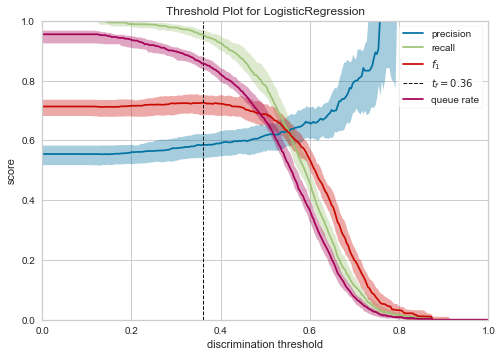

In [41]:
def parkinson_prediction(algorithm, train_x, test_x, train_y,test_y, cols,cf, threshold_plot):
    algorithm.fit(train_x, train_y)
    predictions = algorithm.predict(test_x)
    probabilities = algorithm.predict_proba(test_x)
    
    
    if cf =='coefficients':
        coefficients = pd.DataFrame(algorithm.coef_.ravel())
    elif cf =='features':
        coefficients = pd.DataFrame(algorithm.feature_importances_)
        
    column_df = pd.DataFrame(cols)
    coef_summary = (pd.merge(coefficients,column_df, left_index= True, right_index= True, how='left'))
    coef_summary.columns = ['coefficients', 'features']
    coef_summary = coef_summary.sort_values(by= 'coefficients', ascending = False)
    
    print(algorithm)
    print("classification_report : ", classification_report(test_y, predictions))
    print("auc score : ", accuracy_score(test_y, predictions))
    
    conf_matrix = confusion_matrix(test_y, predictions)
    
    model_roc_auc = roc_auc_score(test_y,predictions)
    
    print('area under the curve : ', model_roc_auc, "\n")
    
    fpr,tpr,thresholds = roc_curve(test_y, probabilities[:,1])

    trace1 = go.Heatmap(z = conf_matrix, 
                        x = ["PD_off", "PD_on"],
                        y = ["PD_off", "PD_on"],
                        showscale = False, colorscale='Picnic',
                        name = 'matrix')
    trace2 = go.Scatter(x = fpr, y = tpr, name="ROC curve : "+str(model_roc_auc),
                       line = dict(color = ('rgb(205,12,24)'), width = 2,))
    
    trace3 = go.Scatter(x = [0,1], y = [0,1], line = dict(color = ('rgb(205,12,24)'), width = 2, dash = 'dot'))

    
    trace4 = go.Bar(x = coef_summary['features'], y = coef_summary['coefficients'],
                   name = 'coefficients',
                   marker = dict(color = coef_summary['coefficients'],
                                colorscale = 'Picnic',
                                line = dict(width = .6, color = 'black')))
    
    fig = tls.make_subplots(rows= 2, cols= 2, specs = [[{},{}], [{'colspan':2}, None]])
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend = False, title = 'Model Performance', 
                        autosize = False, height = 900, width = 800, 
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240,0.95)',
                        margin = dict(b=195))
    
    fig['layout']['xaxis2'].update(dict(title = 'false positive rate'))
    fig['layout']['yaxis2'].update(dict(title = 'True Positive Rate'))
    fig['layout']['xaxis3'].update(dict(showgrid = True, tickfont= dict(size =10), tickangle = 90))
    
    py.plot(fig, filename='Machine Learning_algos.html')
    
    if threshold_plot ==  True:
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(train_x, train_y)
        visualizer.poof()
        


logit = LogisticRegression(C = 1.0, class_weight=None, dual=False, fit_intercept=True,
                          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                          penalty='l2', random_state=None, solver = 'liblinear', tol = 0.0001,
                          verbose=0 , warm_start=False)

parkinson_prediction(logit, X_train, X_test, y_train, y_test, cols, "coefficients", threshold_plot=True)

##### SVM 

In [42]:
from sklearn.svm import SVC

mdl_svc = SVC(kernel='linear')
mdl_svc.fit(X_train, y_train)
predictions = mdl_svc.predict(X_test) 
print(classification_report(y_test, predictions)) 




              precision    recall  f1-score   support

           0       0.82      0.37      0.51       697
           1       0.60      0.92      0.73       728

    accuracy                           0.65      1425
   macro avg       0.71      0.64      0.62      1425
weighted avg       0.71      0.65      0.62      1425



In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel':['rbf', 'linear', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.537, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.533, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.533, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.620, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.613, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.610, total=   0.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.525, total=   0.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.525, total=   0.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.525, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.494, total=   0.2s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.478, total=   0.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.606, total=   0.3s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.584, total=   0.3s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.603, total=   0.3s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.628, total=   0.2s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.619, total=   0.2s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.611, total=   0.3s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.636, total=   0.4s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.617, total=   0.4s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.627, total=   0.6s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ... C=10, gamma=0.001, kernel=sigmoid, score=0.551, total=   0.3s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ... C=10, gamma=0.001, kernel=sigmoid, score=0.598, total=   0.2s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ... C=10, gamma=0.001, kernel=sigmoid, score=0.588, total=   0.3s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.551, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.599, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.587, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.536, total=   1.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.524, total=   1.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.544, total=   1.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.634, total=  16.6s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  6.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [44]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [45]:
mdl_svc = SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

mdl_svc.fit(X_train, y_train)
predictions = mdl_svc.predict(X_test) 
print(classification_report(y_test, predictions)) 
print("auc score : ", accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.79      0.40      0.53       697
           1       0.61      0.90      0.73       728

    accuracy                           0.65      1425
   macro avg       0.70      0.65      0.63      1425
weighted avg       0.70      0.65      0.63      1425

auc score :  0.6547368421052632


I compared 10 popular classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure.

1.SVC

2.Decision Tree

3.AdaBoost

4.Random Forest

5.Extra Trees

6.Gradient Boosting

7.Multiple layer perceprton (neural network)

8.KNN

9.Logistic regression

10.Linear Discriminant Analysis

In [46]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [47]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

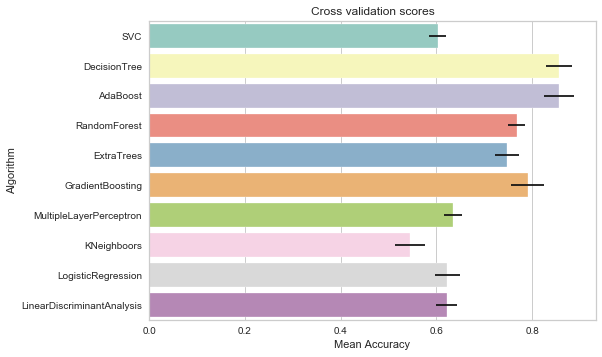

In [48]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=10))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

#### HyperParameter Tuning For the best Model

In [49]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_
ada_best

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 840 tasks      | elapsed:   17.5s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   22.1s finished


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                         

In [50]:
gsadaDTC.best_score_

0.8669876617514294

In [51]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   20.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  6.8min finished


0.9127294613301233

In [52]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   34.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  1.8min finished


0.8275654529040024

In [53]:
###Extra Tree Tuning

ETC = ExtraTreesClassifier()

## Search grid for optimal parameters
ET_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsETC = GridSearchCV(ETC,param_grid = ET_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsETC.fit(X_train,y_train)

ETC_best = gsETC.best_estimator_

# Best score
gsETC.best_score_


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   29.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.9min finished


0.8742100511585916

In [54]:
predictions = RFC_best.predict(X_test) 
print("Random Forest Classification Report")
print(classification_report(y_test, predictions)) 
print("auc score : ", accuracy_score(y_test, predictions))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       697
           1       0.94      0.93      0.94       728

    accuracy                           0.93      1425
   macro avg       0.93      0.93      0.93      1425
weighted avg       0.93      0.93      0.93      1425

auc score :  0.9340350877192982


In [56]:
predictions =ETC_best.predict(X_test) 
print("Extra Tree Classification Report")
print(classification_report(y_test, predictions)) 
print("auc score : ", accuracy_score(y_test, predictions))

Extra Tree Classification Report
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       697
           1       0.89      0.92      0.90       728

    accuracy                           0.90      1425
   macro avg       0.90      0.90      0.90      1425
weighted avg       0.90      0.90      0.90      1425

auc score :  0.8982456140350877


In [57]:
predictions = ada_best.predict(X_test) 
print("Ada Boost(Decision Tree) Classification Report")
print(classification_report(y_test, predictions)) 
print("auc score : ", accuracy_score(y_test, predictions))

Ada Boost(Decision Tree) Classification Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       697
           1       0.87      0.86      0.87       728

    accuracy                           0.87      1425
   macro avg       0.87      0.87      0.87      1425
weighted avg       0.87      0.87      0.87      1425

auc score :  0.8666666666666667


In [58]:
predictions = GBC_best.predict(X_test) 
print("Gradient Boosting Classification Report")
print(classification_report(y_test, predictions)) 
print("auc score : ", accuracy_score(y_test, predictions))

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       697
           1       0.85      0.85      0.85       728

    accuracy                           0.85      1425
   macro avg       0.85      0.85      0.85      1425
weighted avg       0.85      0.85      0.85      1425

auc score :  0.847719298245614
